In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from itertools import product
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u

In [2]:
psfs = glob.glob('/data/scratch/bariskurtkaya/dataset/NIRCAM/1441/mastDownload/JWST/*psfstack*.fits')

In [3]:
psfs

['/data/scratch/bariskurtkaya/dataset/NIRCAM/1441/mastDownload/JWST/jw01441-a3001_t004_nircam_f335m-maskrnd-sub320a335r_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1441/mastDownload/JWST/jw01441-a3001_t004_nircam_f335m-maskbar-sub320alwb_psfstack.fits',
 '/data/scratch/bariskurtkaya/dataset/NIRCAM/1441/mastDownload/JWST/jw01441-a3001_t004_nircam_f250m-maskbar-sub320alwb_psfstack.fits']

In [5]:
a = fits.open(psfs[0])

In [ ]:
a[0].header

In [ ]:
#HIP-68245
#13h 58m 16.27s
#−42° 06′ 02.7″

#0
#209.5676242177876             
#-42.10085611849716

#1
#209.5676242180589               
#-42.10085611831919

#2
#209.567624217934 
#-42.10085611840115

#HD 140986
#3
#236.689207984252 
#-6.120355507559684


In [6]:
def get_wcs(fits):

    wcs = WCS(fits[1].header, naxis=2)

    return wcs

In [7]:
def get_ra_dec(fits):

    ra  = fits[0].header['TARG_RA'] 
    dec = fits[0].header['TARG_DEC']

    return ra, dec

In [8]:
def get_skycoord(ra, dec):
    ra = Longitude(ra, unit=u.deg)
    dec = dec * u.deg
    sky_coord = SkyCoord(ra, dec, frame='icrs')
    sky_coord = SkyCoord(frame=ICRS, ra=ra, dec=dec)

    return sky_coord

In [9]:
def skycoord_to_pixel(wcs,skycoord):

    x, y = wcs.world_to_pixel(skycoord)

    return x, y

In [ ]:
wcs = get_wcs(a)
ra, dec = get_ra_dec(a)
sky_coord = get_skycoord(ra, dec)
x, y = skycoord_to_pixel(wcs, sky_coord)
x, y

RA:200.6285840477514  DEC:-6.202862372264712 ---> x:166.98020582604954  y:175.01845790621337
-8.03825208016383

RA:200.6285840024417  DEC:-6.202862460863005 ---> x:229.2480113845281  y:175.61108334965957
53.63692803486853

RA:199.6200638803333  DEC:1.245893805751041 ---> x:266.97609201954737  y:169.41939422245503
97.55669779709234



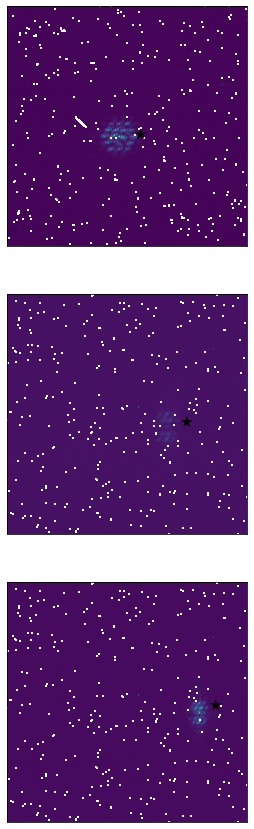

In [12]:
bs = 1
nrows = 3
fig, axes = plt.subplots(nrows=nrows,ncols=bs,figsize=(15,15))
xs = []
ys = []
for i, (row,col) in enumerate(product(range(nrows),range(bs))):

    a = fits.open(psfs[i])
    wcs = get_wcs(a)
    ra, dec = get_ra_dec(a)
    sky_coord = get_skycoord(ra, dec)
    x, y = skycoord_to_pixel(wcs, sky_coord)
    print(f'RA:{ra}  DEC:{dec} ---> x:{x}  y:{y}')
    print(x-y)
    print()
    axes[row].imshow(a[1].data[0])
    axes[row].set_yticks([])
    axes[row].set_xticks([])
    #axes[row][col].invert_yaxis()
    axes[row].text(x, y, s="\u2605", fontsize=15, color='black')#u"\u2734"

In [ ]:
masks = glob.glob('/home/sarperyn/crds_cache/jwst_ops/references/jwst/nircam/*psfmask*.fits')

In [ ]:
mask_sci = []
for i in range(len(masks)):
    mask = fits.open(masks[i])
    mask_sci.append(mask[1].data)

In [ ]:
fits.open(masks[2])[0].header

In [ ]:
for i in range(len(masks)):
    print(fits.open(masks[i])[0].header['FILTER'],fits.open(masks[i])[0].header['CORONMSK'])

In [ ]:

_, axes = plt.subplots(nrows=2,ncols=11,figsize=(40,13))
for i, (row,col) in enumerate(product(range(2),range(11))):
    if row == 0:
        axes[row][col].imshow(mask_sci[i])
    
    elif row == 1:
        axes[row][col].imshow(mask_sci[i])

    axes[row][col].set_yticks([])
    axes[row][col].set_xticks([])

#plt.text(0.10, 1, ints+1, fontsize=15,fontweight='bold',transform=plt.gcf().transFigure)
#_.patch.set_facecolor('#423f3b')
plt.subplots_adjust(wspace=0,hspace=0)
#plt.savefig(f'chair270_{a}-{a+8}.png',format='png',dpi=100)
plt.show() 